In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

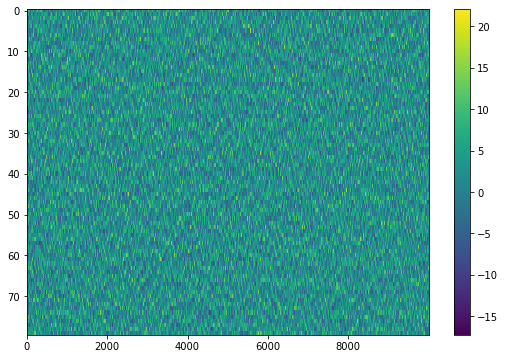

In [35]:
from scipy.integrate import solve_ivp as scpy_solve_ivp

N = 80  # Number of variables
F = 10  # Forcing

def L96(t,x):
    d = np.zeros(N)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d

x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable


t = np.linspace(0.0, 1000.0, 10000)
sol = scpy_solve_ivp(L96, [t[0],t[-1]], x0, t_eval=t)

plt.imshow(sol.y, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()


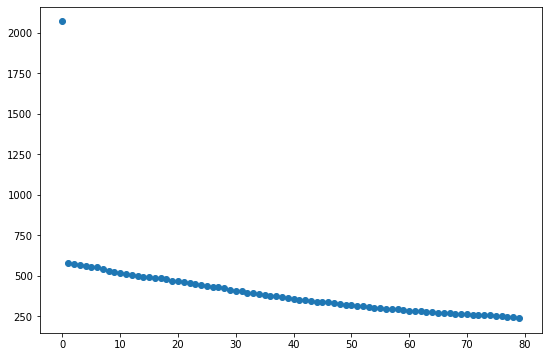

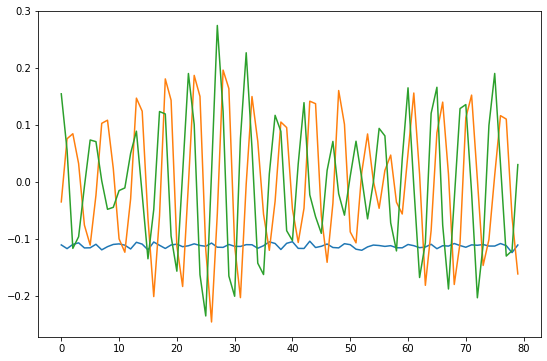

In [37]:
data_matrix = sol.y[:,2000:]

U,S,V = np.linalg.svd(data_matrix, full_matrices=False)

plt.plot(S,'o')
plt.show()

rdim = 3
for k in range(rdim):
    plt.plot(U[:,k])
    
plt.show()